# When Do We Want Our Snacks? <a name="TOC"></a>
### <i>A study of over 32 Million items purchased from Instacart</i>
<br>

1. [Introduction](#introduction)
2. [Data Overview](#data-overview)
3. [Data Combining & Cleaning](#combining)
4. [Data Exploration](#data-exploration)
5. [Answering the Question](#answering-the-question)<br>
     a. [Which foods are most popular during each hour of the day?](#q1) <br>
     b. [So when are we ordering our damn snacks?](#q2) <br>
6. [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

The data we’re using is provided by Instacart, a company that offers same-day grocery delivery and pick-up. This anonymized data (from 2017) contains a sample of over 3 million grocery orders from more than 200,000 American Instacart users – a total of over 32 million purchased products and almost 50,000 unique individual products. For each user, Instacart provided between 4 and 100 of their orders. View the data on <a href="https://www.kaggle.com/c/instacart-market-basket-analysis/data">Kaggle</a>.


I was most interested in exploring the time-based data (day of week and hour of day), leading me to my initial question: <br>
<b>What food is most popular during each hour of the day?</b>

As you’ll see through my analysis, this question changed to focus on one department in particular. 

[↑ Back to TOC](#TOC)
## Data Overview <a name="data-overview"></a>
We have been provided with six main datasets:
1. [products.csv](#products)
2. [aisles.csv](#aisles)
3. [departments.csv](#departments)
4. [orders.csv](#orders)
4. [order_products_prior.csv](#order_products_prior) *
4. order_products_train

*Note that for the purposes of this exploration, we are using the <b>order_products__prior.csv</b> dataset as opposed to the <b>order_products__train.csv</b> dataset. They contain the same type of information, but train is a subset of prior.

In [1]:
import numpy as np 
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')

### products.csv <a name="products"></a>
The products table has close to 50,000 unique individual product names, with corresponding product id, aisle id and department id.

In [3]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [4]:
# total of 49,688 unique products
total_unique_products = products.product_name.unique().shape[0]
total_unique_products

49688

### aisles.csv <a name="aisles"></a>
The aisles table provides the aisle name for each of the 134 aisle ids.

In [5]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
aisles.shape[0]

134

In [7]:
aisles['aisle'].duplicated().sum()

0

In [8]:
aisles['aisle'].unique()
# Noting that there are non-food related aisles, and a 'missing' category 

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

### departments.csv <a name="departments"></a>
The departments table provides the department name for each of the 21 department ids.

In [9]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
departments['department'].unique()
# Note that there are non-food related departments, and a 'missing' category

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

### orders.csv <a name="orders"></a>
For each of order (over 3 million), the orders table provides the:
* order id
* user id
* evaluation set type (prior, train, test: not needed for our purposes)
* order number (for each user)
* day of the week the order was made
* hour of the day the order was made 
* days since the the prior order (not needed for our purposes)

In [11]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
# values for day of week
# for the purposes of this exploration, we are assuming 0 = Sunday, 1 = Monday, etc., as Instacart did not provide official confirmation. 
sorted(orders['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

In [13]:
# values for hour of day
# for the purposes of this exploration, we are assuming 0 = midnight, 12 = noon, 23 = 11pm
sorted(orders['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [14]:
# Quickly reviewing orders per user
orders_per_user = pd.DataFrame(orders.groupby(orders['user_id']).size(), columns = ['orders_per_user'])

<Figure size 1080x144 with 0 Axes>

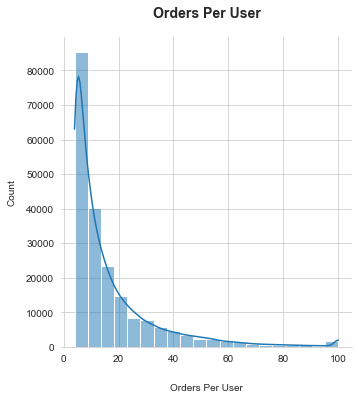

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,2)) # not sure why this isn't working

sns.displot(orders_per_user, x="orders_per_user", bins=20, kde=True)

plt.title("Orders Per User", fontsize=14, weight='bold', pad=20)
plt.xlabel("Orders Per User", labelpad=20)
plt.ylabel("Count", labelpad=10)
plt.tick_params(bottom=False)
sns.despine(left=True)

In [16]:
print(f"Total # of Users: {orders_per_user.shape[0]}")
print(f"Minimum orders per user: {orders_per_user['orders_per_user'].min()}*")
print(f"Max orders per user: {orders_per_user['orders_per_user'].max()}*")
print(f"Mean orders per user: {round(st.mean(orders_per_user['orders_per_user']),0)}")
print(f"Median orders per user: {st.median(orders_per_user['orders_per_user'])}")
print(f"Mode orders per user: {st.mode(orders_per_user['orders_per_user'])}")
print(f"Standard deviation of orders per user: {round(st.stdev(orders_per_user['orders_per_user']),0)}")
print("* Note that we are just confirming the max and min, as Instacart only provided 4-100 order samples per user.")

Total # of Users: 206209
Minimum orders per user: 4*
Max orders per user: 100*
Mean orders per user: 17.0
Median orders per user: 10
Mode orders per user: 4
Standard deviation of orders per user: 17.0
* Note that we are just confirming the max and min, as Instacart only provided 4-100 order samples per user.


It appears the average user in our sample data places 17 orders. Although this trend looks quite consistent, since the min and max order samples per user are ultimately determined by Instacart, I will choose to omit user data from my analysis. 

### order_products_prior.csv <a name="order_products_prior"></a>

The orders_products_prior table specifies which products were purchased in each order (32,434,489 products purchased in total):
* product id
* the order that products were added to cart
* whether the customer has a previous order that contains the same product ('reordered': some orders will have no reordered items)

[↑ Back to Data Overview](#data-overview)

In [17]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


[↑ Back to TOC](#TOC)
## Data Combining & Cleaning <a name="combining"></a>
Since the data was normalized into five main dataframes, it would be more efficient and insightful to merge relevant information into one dataframe to explore further. First, let's merge the orders table (getting the order day of week and hour of day) and the order_products_prior table (getting the product ids for each order) using the order id.

In [18]:
# filter orders table to retain only prior eval set (to match orders_products_prior)
orders_prior = orders[orders['eval_set'] == 'prior'].copy()

In [19]:
orders_prior.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [20]:
# drop unnecessary columns 
# we've already decided to drop user id, as it was capped by Instacart
# as our question is focused on item types ordered based on time, we can remove evaluation info and days since last order
orders_prior.drop(columns=['user_id', 'order_number', 'eval_set', 'days_since_prior_order'], inplace=True)

In [21]:
orders_prior.head(5)

,order_id,order_dow,order_hour_of_day
0,2539329,2,8
1,2398795,3,7
2,473747,3,12
3,2254736,4,7
4,431534,4,15


In [22]:
order_products_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [23]:
# removing unecessary columns from order_projects_prior
order_products_prior_id = order_products_prior.copy()
order_products_prior_id.drop(columns=['add_to_cart_order', 'reordered'], inplace=True)

In [24]:
order_products_prior_id.head(5)

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [25]:
# joining the cleaned orders_prior and order_products_prior_id tables on order_id
df = pd.merge(orders_prior, order_products_prior_id, how='inner', left_on='order_id', right_on='order_id')

In [26]:
df

,order_id,order_dow,order_hour_of_day,product_id
0,2539329,2,8,196
1,2539329,2,8,14084
2,2539329,2,8,12427
3,2539329,2,8,26088
4,2539329,2,8,26405
...,...,...,...,...
32434484,2977660,1,12,14197
32434485,2977660,1,12,38730
32434486,2977660,1,12,31477
32434487,2977660,1,12,6567


We now have the product id and time ordered, but need to add the department and aisle columns to the main df, based on each row's product id. 

In [27]:
# merge with products to get product name, aisle and department ids
df = pd.merge(df, products, how='inner', left_on='product_id', right_on='product_id')

In [28]:
df.head(5)

,order_id,order_dow,order_hour_of_day,product_id,product_name,aisle_id,department_id
0,2539329,2,8,196,Soda,77,7
1,2398795,3,7,196,Soda,77,7
2,473747,3,12,196,Soda,77,7
3,2254736,4,7,196,Soda,77,7
4,431534,4,15,196,Soda,77,7


In [29]:
# merge with aisles and departments tables to decode corresponding ids
df = pd.merge(df, aisles, how='inner', left_on='aisle_id', right_on='aisle_id')
df = pd.merge(df, departments, how='inner', left_on='department_id', right_on='department_id')

In [30]:
# remove aisle and department ids since we now have the string value for each
df.drop(columns=['aisle_id', 'department_id'], inplace=True)

In [31]:
df.head(3)

,order_id,order_dow,order_hour_of_day,product_id,product_name,aisle,department
0,2539329,2,8,196,Soda,soft drinks,beverages
1,2398795,3,7,196,Soda,soft drinks,beverages
2,473747,3,12,196,Soda,soft drinks,beverages


In [32]:
# checking where aisle = missing and department = missing, and comparing if the arrays we recieve are the same
(np.where(df['aisle'] == 'missing')[0] == np.where(df['department'] == 'missing')[0]).all()
# since True is returned, we know that the rows with missing values are consistently missing aisle and dept

True

In [33]:
# Removing rows in which department and aisle values are missing
df = df.loc[(df['aisle'] != 'missing') & (df['department'] != 'missing')]

In [34]:
# we noticed in exploration that there are non-food related departments in our dataset
df['department'].unique()

array(['beverages', 'dairy eggs', 'snacks', 'household', 'produce',
       'breakfast', 'pantry', 'deli', 'frozen', 'personal care',
       'meat seafood', 'international', 'bakery', 'canned goods',
       'dry goods pasta', 'alcohol', 'pets', 'babies', 'other', 'bulk'],
      dtype=object)

In [35]:
# removing non-food related products from our dataset
df = df.loc[~df['department'].isin(['pets', 'personal care', 'household', 'babies', 'missing'])]

In [36]:
# confirming the correct row values were removed
df['department'].unique()

array(['beverages', 'dairy eggs', 'snacks', 'produce', 'breakfast',
       'pantry', 'deli', 'frozen', 'meat seafood', 'international',
       'bakery', 'canned goods', 'dry goods pasta', 'alcohol', 'other',
       'bulk'], dtype=object)

Moving forward, when we talk about products ordered, we are specifically talking about FOOD products ordered. 

In [37]:
df

,order_id,order_dow,order_hour_of_day,product_id,product_name,aisle,department
0,2539329,2,8,196,Soda,soft drinks,beverages
1,2398795,3,7,196,Soda,soft drinks,beverages
2,473747,3,12,196,Soda,soft drinks,beverages
3,2254736,4,7,196,Soda,soft drinks,beverages
4,431534,4,15,196,Soda,soft drinks,beverages
...,...,...,...,...,...,...,...
32434484,2939884,1,13,27414,Organic Emmer Farro,bulk grains rice dried goods,bulk
32434485,3267360,5,16,27414,Organic Emmer Farro,bulk grains rice dried goods,bulk
32434486,414077,6,12,27414,Organic Emmer Farro,bulk grains rice dried goods,bulk
32434487,813243,2,6,27414,Organic Emmer Farro,bulk grains rice dried goods,bulk


[↑ Back to TOC](#TOC)
## Data Exploration <a name="data-exploration"></a>
Now that we've merged the columns we're interested in into one dataframe, we can continue with our exploration. 

Our question – "which foods are most popular during each hour of the day? – requires us to group the individual products. Since we've seen there are 21 unique departments and 134 unique aisles, let's focus on product departments for a good overall picture. 

In [38]:
# making a copy of the main dataframe, focusing on products (product id, name, aisle, department, and amount ordered)
df_products_ordered = pd.DataFrame(df.groupby(['product_id', 'product_name', 'aisle', 'department']).size().copy(), columns=['amount_ordered'])

In [39]:
df_products_ordered.reset_index(inplace=True)

In [40]:
df_products_ordered

,product_id,product_name,aisle,department,amount_ordered
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks,1852
1,2,All-Seasons Salt,spices seasonings,pantry,90
2,3,Robust Golden Unsweetened Oolong Tea,tea,beverages,277
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen meals,frozen,329
4,5,Green Chile Anytime Sauce,marinades meat preparation,pantry,15
...,...,...,...,...,...
36718,49682,California Limeade,juice nectars,beverages,108
36719,49683,Cucumber Kirby,fresh vegetables,produce,97315
36720,49684,"Vodka, Triple Distilled, Twist of Vanilla",spirits,alcohol,9
36721,49685,En Croute Roast Hazelnut Cranberry,frozen vegan vegetarian,frozen,49


We can now use the df_products_ordered dataframe to explore departments and most popular items!
Let's see how many unique products are in each department:

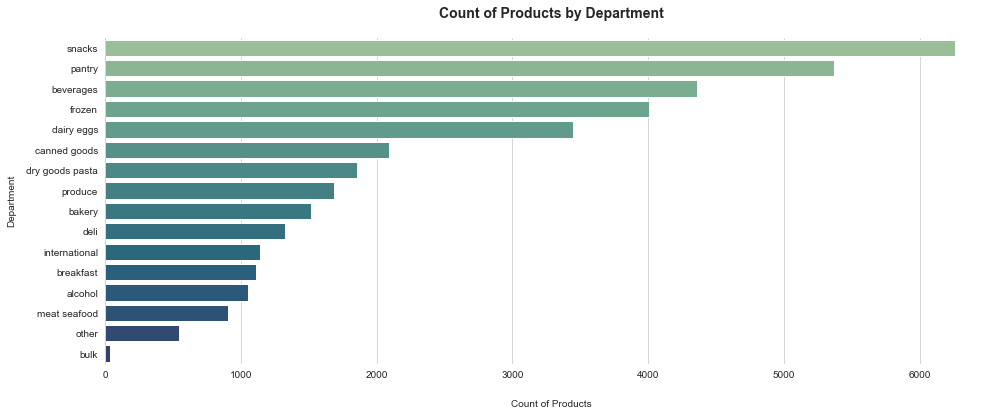

In [41]:
plt.figure(figsize=(16,6))

ax = sns.countplot(data=df_products_ordered, y='department', order = df_products_ordered['department'].value_counts().index, palette='crest')

plt.title("Count of Products by Department", fontsize=14, weight='bold', pad=20)
plt.xlabel("Count of Products", labelpad=20)
plt.ylabel("Department", labelpad=10)
plt.tick_params(bottom=False)
sns.despine(bottom=True)

In [42]:
# find the count of all products in the snack department
total_snack_products = df_products_ordered.groupby('department').size().loc['snacks']

In [43]:
print(f"The snack department has the largest count of products ({total_snack_products} of all {total_unique_products}), making up {round((total_snack_products / total_unique_products)*100,1)}% of the total products.")

The snack department has the largest count of products (6263 of all 49688), making up 12.6% of the total products.


Let's see which items are ordered the most, overall. 

In [44]:
# find the top 10 most ordered products
top_ten_products = df_products_ordered.sort_values(by = ['amount_ordered'], ascending = False).head(10)

In [45]:
top_ten_products

,product_id,product_name,aisle,department,amount_ordered
18289,24852,Banana,fresh fruits,produce,472565
9655,13176,Bag of Organic Bananas,fresh fruits,produce,379450
15575,21137,Organic Strawberries,fresh fruits,produce,264683
16148,21903,Organic Baby Spinach,packaged vegetables fruits,produce,241921
34857,47209,Organic Hass Avocado,fresh fruits,produce,213584
35271,47766,Organic Avocado,fresh fruits,produce,176815
35165,47626,Large Lemon,fresh fruits,produce,152657
12356,16797,Strawberries,fresh fruits,produce,142951
19305,26209,Limes,fresh fruits,produce,140627
20510,27845,Organic Whole Milk,milk,dairy eggs,137905


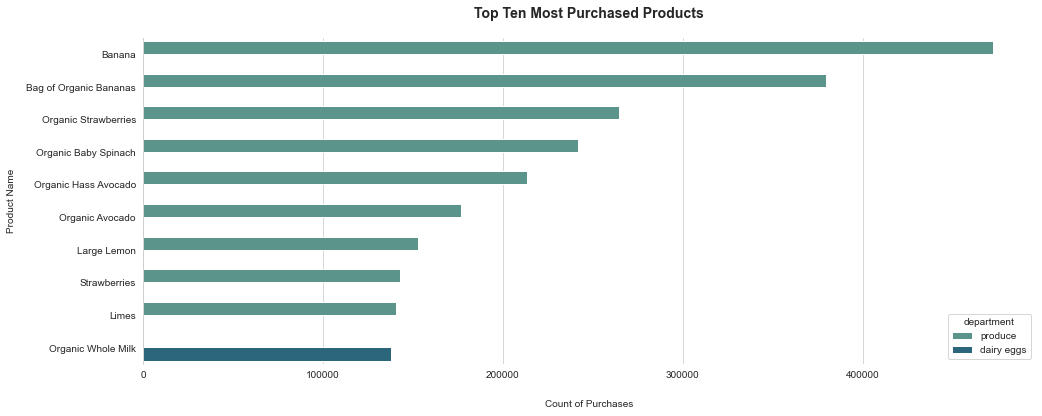

In [103]:
# creating a chart to show the results
plt.figure(figsize=(16,6))

ax = sns.barplot(data=top_ten_products, x='amount_ordered', y='product_name', hue='department', palette='crest')
plt.title("Top Ten Most Purchased Products", fontsize=14, weight='bold', pad=20)
plt.xlabel("Count of Purchases", labelpad=20)
plt.ylabel("Product Name", labelpad=10)
plt.tick_params(bottom=False)
sns.despine(bottom=True)

Despite the snacks department having the most product options, the top nine of the ten most purchased products are from the product department, with bananas leading the charge! 

The second area we are most interested in is the time based data we have been provided with (order day of week, and order hour of day). Let's take a look at those two metrics, starting with the day of week:
#### How does the <em>day of week</em> affect total orders + total products ordered?

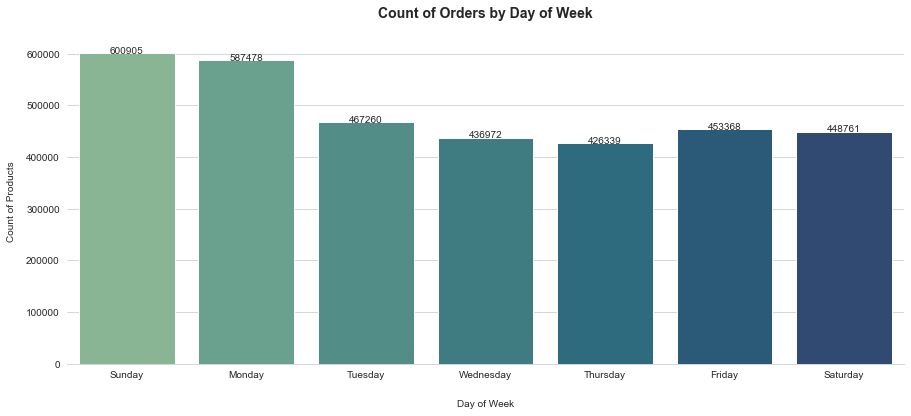

In [47]:
plt.figure(figsize=(15,6))

ax = sns.countplot(data=orders, x='order_dow', palette='crest')

plt.title("Count of Orders by Day of Week", fontsize=14, weight='bold', pad=20)
plt.xlabel("Day of Week", labelpad=20)
plt.ylabel("Count of Products", labelpad=10)
plt.xticks(np.arange(7),['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']) # Reset DOW to string 
plt.tick_params(bottom=False)
sns.despine(left=True)
for rect in ax.patches: # show count label
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + .75, rect.get_height(), horizontalalignment='center')

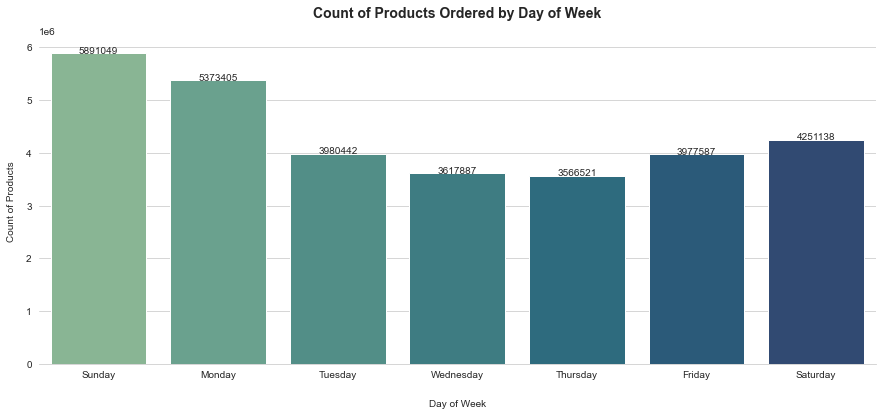

In [48]:
plt.figure(figsize=(15,6))

ax = sns.countplot(data=df, x='order_dow', palette='crest')

plt.title("Count of Products Ordered by Day of Week", fontsize=14, weight='bold', pad=20)
plt.xlabel("Day of Week", labelpad=20)
plt.ylabel("Count of Products", labelpad=10)
plt.xticks(np.arange(7),['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']) # Reset DOW to string 
plt.tick_params(bottom=False)
sns.despine(left=True)
for rect in ax.patches: # show count label
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + .75, rect.get_height(), horizontalalignment='center')

The most orders are placed on Sunday and Monday, and the amount of products per order seems to be consistent, as the most products are also ordered on Sunday and Monday. 

#### How does the <em>hour of the day</em> affect total orders + total products ordered?

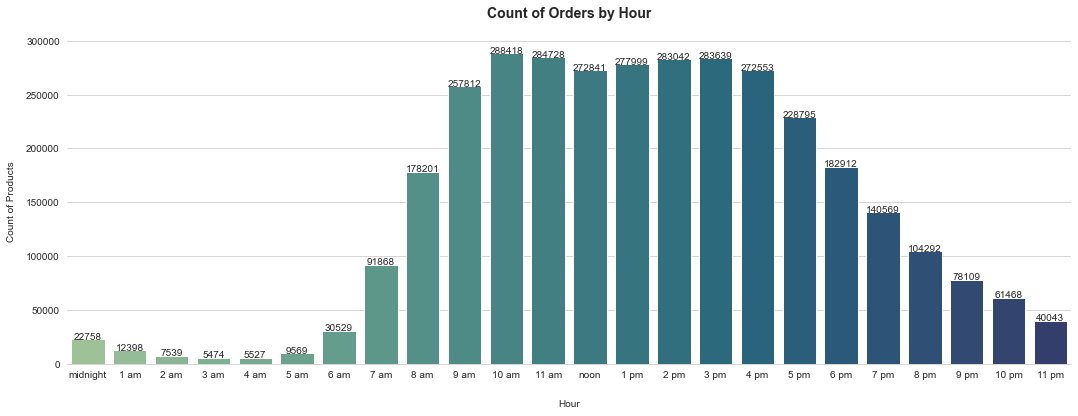

In [105]:
plt.figure(figsize=(18,6))

ax = sns.countplot(data=orders, x='order_hour_of_day', palette='crest')

plt.title("Count of Orders by Hour", fontsize=14, weight='bold', pad=20)
plt.xlabel("Hour", labelpad=20)
plt.ylabel("Count of Products", labelpad=10)
plt.xticks(np.arange(24),['midnight','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','noon','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm']) # Reset DOW to string 
plt.tick_params(bottom=False)
sns.despine(left=True)
for rect in ax.patches: # show count label
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + .75, rect.get_height(), horizontalalignment='center')
    

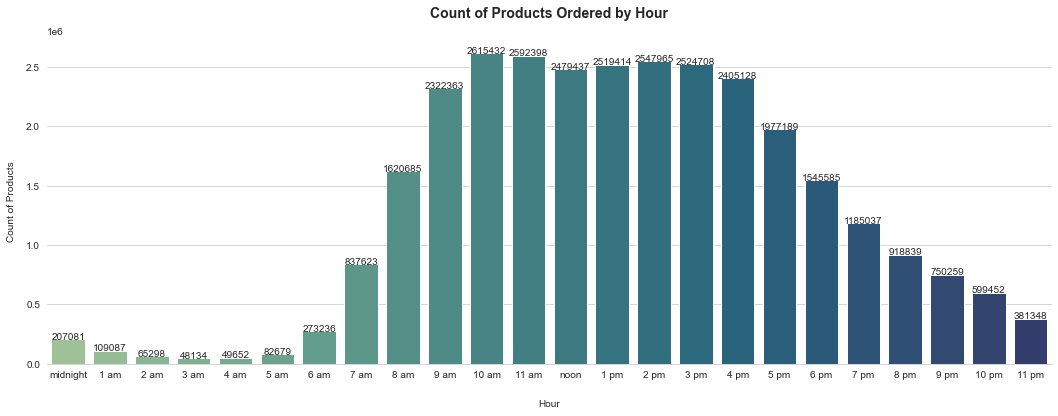

In [104]:
plt.figure(figsize=(18,6))

ax = sns.countplot(data=df, x='order_hour_of_day', palette='crest')

plt.title("Count of Products Ordered by Hour", fontsize=14, weight='bold', pad=20)
plt.xlabel("Hour", labelpad=20)
plt.ylabel("Count of Products", labelpad=10)
plt.xticks(np.arange(24),['midnight','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','noon','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm']) # Reset DOW to string 
plt.tick_params(bottom=False)
sns.despine(left=True)
for rect in ax.patches: # show count label
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + .75, rect.get_height(), horizontalalignment='center')

Nothing too out of the ordinary to report here - as we might expect, the majority of orders are made between 9 and 5 pm, and the count of products orders follows the same trend.

[↑ Back to TOC](#TOC)
## Answering the Question <a name="answering-the-question"></a>
Now we have a better sense of how products are distributed via departments and how orders and individual product purchases trend during the week and throughout the day. Let's revisit our question, using departments as our food product groupings. 

### Which foods are most popular during each hour of the day?<a name="q1"></a>

In [51]:
# Grouping main dataframe by order hour of day and department, getting count of orders, converting to dataframe, and renaming size column to product count
department_by_hour = pd.DataFrame(df.groupby(['order_hour_of_day', 'department']).size().copy(), columns=['product_count'])

In [52]:
department_by_hour.head()

product_count
order_hour_of_day department               
0                 alcohol               501
                  bakery               7326
                  beverages           17575
                  breakfast            4368
                  bulk                  238

In [53]:
# resetting index
department_by_hour = department_by_hour.reset_index()

In [54]:
department_by_hour.head()

,order_hour_of_day,department,product_count
0,0,alcohol,501
1,0,bakery,7326
2,0,beverages,17575
3,0,breakfast,4368
4,0,bulk,238


In addition to the total count of products (by order hour and department), let's find the % of total products ordered.

In [55]:
# getting the total count of all products ordered (excluding missing values and non-food departments, as filtered earlier)
total_items_ordered = df.shape[0]

In [56]:
total_items_ordered

30658029

In [57]:
# adding a column with the % of each grouping by total products ordered
department_by_hour['percent_of_total_products'] = (department_by_hour['product_count'] / total_items_ordered)*100

In [58]:
department_by_hour

,order_hour_of_day,department,product_count,percent_of_total_products
0,0,alcohol,501,0.001634
1,0,bakery,7326,0.023896
2,0,beverages,17575,0.057326
3,0,breakfast,4368,0.014247
4,0,bulk,238,0.000776
...,...,...,...,...
379,23,meat seafood,8723,0.028453
380,23,other,425,0.001386
381,23,pantry,24220,0.079001
382,23,produce,126476,0.412538


In addition to the % of total products, let's find the % of total products ordered <b>within each hour</b>.

In [59]:
# adding a column with the total count of all products ordered within each hour
department_by_hour['total_products_by_hour'] = department_by_hour.groupby('order_hour_of_day')['product_count'].transform('sum')

In [60]:
department_by_hour.head()

,order_hour_of_day,department,product_count,percent_of_total_products,total_products_by_hour
0,0,alcohol,501,0.001634,207081
1,0,bakery,7326,0.023896,207081
2,0,beverages,17575,0.057326,207081
3,0,breakfast,4368,0.014247,207081
4,0,bulk,238,0.000776,207081


In [61]:
# adding a column with the % of each grouping by total products ordered within each hour
department_by_hour['percent_of_total_hourly_orders'] = (department_by_hour['product_count'] / department_by_hour['total_products_by_hour']) * 100

In [62]:
# sorting values by hour ascending, then order count descending
department_by_hour.sort_values(by = ['order_hour_of_day', 'product_count'], ascending=[True, False], inplace=True)

In [63]:
department_by_hour.head(20)

,order_hour_of_day,department,product_count,percent_of_total_products,total_products_by_hour,percent_of_total_hourly_orders
14,0,produce,68393,0.223083,207081,33.027173
6,0,dairy eggs,34775,0.113429,207081,16.792946
15,0,snacks,17776,0.057982,207081,8.584081
2,0,beverages,17575,0.057326,207081,8.487017
9,0,frozen,15650,0.051047,207081,7.557429
13,0,pantry,13626,0.044445,207081,6.580034
1,0,bakery,7326,0.023896,207081,3.537746
5,0,canned goods,7183,0.023429,207081,3.468691
7,0,deli,6920,0.022572,207081,3.341688
8,0,dry goods pasta,5892,0.019218,207081,2.845263


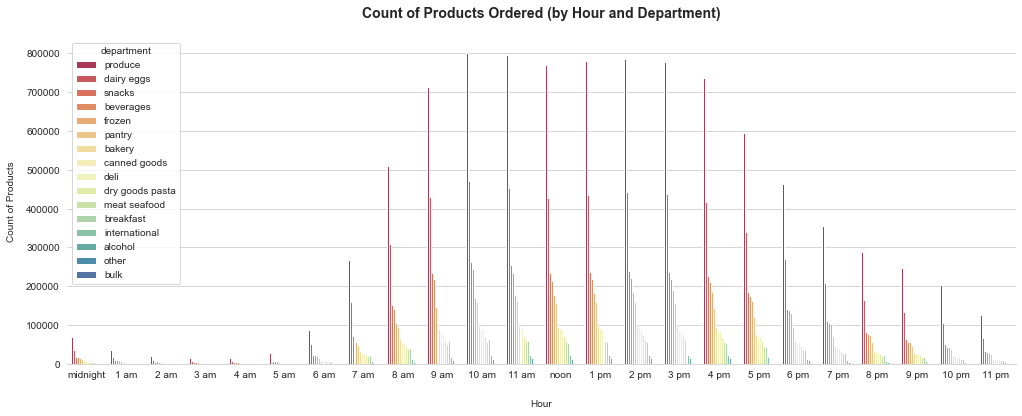

In [64]:
# Display count of products ordered (by hour and department)
plt.figure(figsize=(17,6))
sns.set_style("whitegrid")

sns.barplot(x='order_hour_of_day', y='product_count', data = department_by_hour, hue = 'department', palette='Spectral')

plt.title("Count of Products Ordered (by Hour and Department)", fontsize=14, weight='bold', pad=20)
plt.xlabel("Hour", labelpad=20)
plt.ylabel("Count of Products", labelpad=10)
plt.xticks(np.arange(24),['midnight','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','noon','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm']) # Reset hours to string 
plt.tick_params(bottom=False)
sns.despine(left=True)

It looks like products from the produce department are the most frequently ordered at all times of the day, with dairy/eggs consistently placing in second. This makes sense, confirming the hourly ordering trends we've already explored. Instead of count of products ordered, let's view the percentage breakdown (by hour and department) to get a more understandable view:

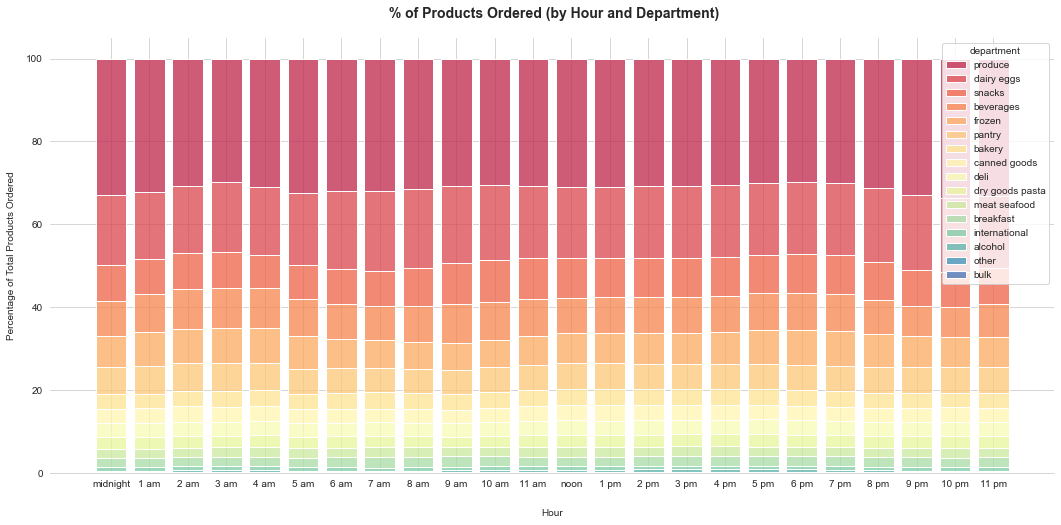

In [65]:
plt.figure(figsize=(18,8))
sns.set_style(style='whitegrid')

sns.histplot(
    department_by_hour,
    x='order_hour_of_day',
    weights='percent_of_total_hourly_orders', # Using the value variable to turn histogram counts into weighted values
    discrete = True, 
    hue='department',
    palette='Spectral',
    multiple='stack',
    edgecolor='white', # Converting bar borders to white
    shrink=0.8 # Shrinking the bar widths so they don't touch horizontally
)

plt.title(" % of Products Ordered (by Hour and Department)", fontsize=14, weight='bold', pad=20)
plt.xlabel("Hour", labelpad=20)
plt.ylabel("Percentage of Total Products Ordered", labelpad=10)
sns.despine(left=True)

plt.xticks(np.arange(24),['midnight','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','noon','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm']) # Reset DOW to string 
for rect in ax.patches: # show count label
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + .75, rect.get_height(), horizontalalignment='center')
# Note: Ideally the legend would not be over chart - could not figure out how to update the placement

<b>It looks like overwhelmingly again, products from the produce department are the most commonly ordered – at any time of day – followed by products from the dairy/eggs department.</b> 

Let's confirm with the data: 

In [66]:
# selecting first entry for each hour of day (= highest count because of previous sorting)
department_by_hour.groupby('order_hour_of_day').first()

,department,product_count,percent_of_total_products,total_products_by_hour,percent_of_total_hourly_orders
order_hour_of_day,,,,,
0,produce,68393,0.223083,207081,33.027173
1,produce,35050,0.114326,109087,32.130318
2,produce,20016,0.065288,65298,30.653313
3,produce,14357,0.046829,48134,29.827149
4,produce,15341,0.050039,49652,30.897043
5,produce,26896,0.087729,82679,32.530631
6,produce,87204,0.284441,273236,31.915267
7,produce,268657,0.876302,837623,32.073737
8,produce,510782,1.666063,1620685,31.516427


<b>Confirmed: the people love their produce – let's see what's left if we remove that department.</b>

In [67]:
# copying the dataset and removing produce
department_by_hour_no_produce = department_by_hour[department_by_hour.department != 'produce'].copy()

In [68]:
# again, selecting first entry for each hour of day (= highest count because of previous sorting)
department_by_hour_no_produce.groupby('order_hour_of_day').first()

,department,product_count,percent_of_total_products,total_products_by_hour,percent_of_total_hourly_orders
order_hour_of_day,,,,,
0,dairy eggs,34775,0.113429,207081,16.792946
1,dairy eggs,17786,0.058014,109087,16.304418
2,dairy eggs,10702,0.034908,65298,16.389476
3,dairy eggs,8079,0.026352,48134,16.784394
4,dairy eggs,8181,0.026685,49652,16.476678
5,dairy eggs,14399,0.046966,82679,17.415547
6,dairy eggs,51579,0.168240,273236,18.877088
7,dairy eggs,159849,0.521394,837623,19.083645
8,dairy eggs,307420,1.002739,1620685,18.968523


<b>Confirmed again! The second most popular department is dairy eggs for each hour – let's try this one more time, and see what's left if we remove this department.</b>

In [69]:
department_by_hour_no_produce_dairy = department_by_hour_no_produce[department_by_hour_no_produce.department != 'dairy eggs'].copy()

In [70]:
department_by_hour_no_produce_dairy.groupby('order_hour_of_day').first()

,department,product_count,percent_of_total_products,total_products_by_hour,percent_of_total_hourly_orders
order_hour_of_day,,,,,
0,snacks,17776,0.057982,207081,8.584081
1,beverages,10031,0.032719,109087,9.195413
2,beverages,6201,0.020226,65298,9.496462
3,beverages,4707,0.015353,48134,9.778950
4,beverages,4795,0.015640,49652,9.657214
5,beverages,7453,0.024310,82679,9.014381
6,snacks,23249,0.075833,273236,8.508762
7,snacks,72451,0.236320,837623,8.649595
8,snacks,150490,0.490867,1620685,9.285580


What we've gathered so far: 

* Roughly half of all items ordered are from the produce and dairy/eggs departments, regardless of the hour of the order. This suggests that Instacart is being used primarily for practical groceries, rather than impulse eating. How disappointing.

* Snacks is generally the third most popular department (with the exception being between 1 - 6 am, when people switch to wanting beverages).

I thought we were all eating more snacks. So, let's explore when we are. 

[↑ Back to TOC](#TOC)
### So when are we ordering our damn snacks? <a name="q2"></a>

In [71]:
# making a copy of the original df that only includes the snack department
snacks = df[df['department'] == 'snacks'].copy()

In [72]:
snacks

,order_id,order_dow,order_hour_of_day,product_id,product_name,aisle,department
8104145,2539329,2,8,12427,Original Beef Jerky,popcorn jerky,snacks
8104146,2398795,3,7,12427,Original Beef Jerky,popcorn jerky,snacks
8104147,473747,3,12,12427,Original Beef Jerky,popcorn jerky,snacks
8104148,2254736,4,7,12427,Original Beef Jerky,popcorn jerky,snacks
8104149,431534,4,15,12427,Original Beef Jerky,popcorn jerky,snacks
...,...,...,...,...,...,...,...
10991690,3047913,0,20,25911,Butterscotch Ice Cream Topping,ice cream toppings,snacks
10991691,1935822,1,16,25911,Butterscotch Ice Cream Topping,ice cream toppings,snacks
10991692,1964778,0,15,38599,Hot Fudge Ice Cream Sauce,ice cream toppings,snacks
10991693,1593743,0,12,38599,Hot Fudge Ice Cream Sauce,ice cream toppings,snacks


In [73]:
total_snack_orders = snacks.shape[0]

In [74]:
print(f"Snacks make up {round((total_snack_orders/total_items_ordered)*100,2)}% of all items ordered. Specifically, {total_snack_orders} products ordered out of a total of {total_items_ordered}.")

Snacks make up 9.42% of all items ordered. Specifically, 2887550 products ordered out of a total of 30658029.


In [75]:
# making a data frame showing count of snack products ordered by day of week and hour of day
snacks_by_time = pd.DataFrame(snacks.groupby(['order_dow', 'order_hour_of_day']).size())

In [76]:
snacks_by_time

0
order_dow order_hour_of_day       
0         0                   2954
          1                   1656
          2                    981
          3                    711
          4                    606
...                            ...
6         19                 14186
          20                 10434
          21                  8764
          22                  6987
          23                  4904

[168 rows x 1 columns]

In [77]:
# resetting index so columns can be renamed
snacks_by_time = snacks_by_time.reset_index()
# rename columns
snacks_by_time.columns = ['order_dow', 'order_hour_of_day', 'snacks_ordered']

In [78]:
snacks_by_time

,order_dow,order_hour_of_day,snacks_ordered
0,0,0,2954
1,0,1,1656
2,0,2,981
3,0,3,711
4,0,4,606
...,...,...,...
163,6,19,14186
164,6,20,10434
165,6,21,8764
166,6,22,6987


In [79]:
# transforming into wide-form dataframe (so we can make a heatmap with Seaborn)
snacks_by_time_pvt = snacks_by_time.pivot(index='order_hour_of_day', columns='order_dow', values='snacks_ordered')

In [80]:
snacks_by_time_pvt

order_dow,0,1,2,3,4,5,6
order_hour_of_day,,,,,,,
0,2954,3124,2463,2209,2017,2513,2496
1,1656,1586,1153,1063,1123,1207,1366
2,981,961,667,694,654,820,865
3,711,614,556,432,505,735,639
4,606,597,503,537,567,623,560
5,845,1109,972,864,979,1081,789
6,2648,4382,3623,3257,3356,3613,2370
7,9955,14197,10153,9324,9426,10510,8886
8,22758,32992,20983,18053,17360,20139,18205


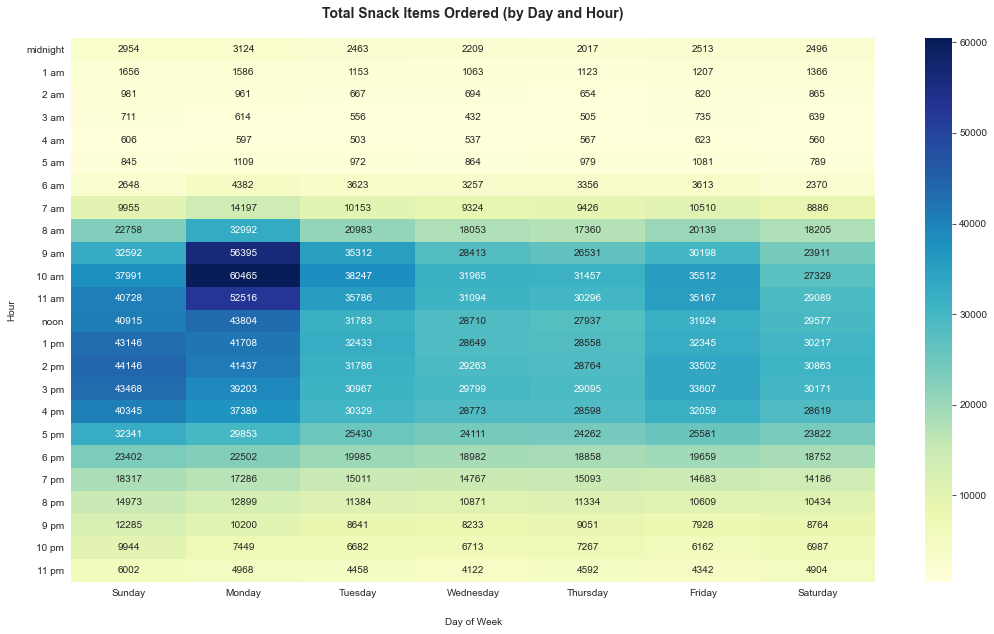

In [81]:
x_axis_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] # labels for x-axis
y_axis_labels = ['midnight','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','noon','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm'] # labels for y-axis

plt.figure(figsize=(18,10))

sns.heatmap(snacks_by_time_pvt, cmap="YlGnBu", xticklabels=x_axis_labels, annot=True, yticklabels=y_axis_labels, fmt='d')

plt.title("Total Snack Items Ordered (by Day and Hour)", fontsize=14, weight='bold', pad=20)
plt.xlabel("Day of Week", labelpad=20)
plt.ylabel("Hour", labelpad=10)
plt.yticks(rotation=0)
plt.tick_params(left=False, bottom=False)

plt.show()

<b>Snacks are most frequently ordered on Sunday and Monday, and by far the popular time is Monday between 9am and noon.</b>

This may not necessarily reflect an increase in snack content relative to the rest of the order. Since we've seen that the most orders are placed on Sunday and Monday, this may simply be a popular time for orders overall. To get a fuller sense of when we want out snacks, let's look at the percentage of snacks in the total order. 

In [82]:
# finding total products ordered count by day and hour (all food departments), values sorted
total_products_ordered_time = pd.DataFrame(df.groupby(['order_dow','order_hour_of_day']).size().reset_index().sort_values(by = ['order_dow', 'order_hour_of_day'], ascending=True))

In [83]:
# dropping uneccesary columns
total_products_ordered_time.drop(columns=['order_dow', 'order_hour_of_day'], inplace=True)

In [84]:
total_products_ordered_time.columns = ['total_products_ordered']

In [85]:
total_products_ordered_time

,total_products_ordered
0,36940
1,21384
2,12056
3,8365
4,7864
...,...
163,162109
164,123975
165,106159
166,87258


In [86]:
# Re-sorting to be certain the index is the same as the total_products_ordered_time table
snacks_by_time = snacks_by_time.sort_values(by = ['order_dow', 'order_hour_of_day'], ascending=True)

In [87]:
snacks_by_time

,order_dow,order_hour_of_day,snacks_ordered
0,0,0,2954
1,0,1,1656
2,0,2,981
3,0,3,711
4,0,4,606
...,...,...,...
163,6,19,14186
164,6,20,10434
165,6,21,8764
166,6,22,6987


In [88]:
# combine the two tables
percentage_snacks_by_time = pd.concat([snacks_by_time, total_products_ordered_time], axis=1)

In [89]:
percentage_snacks_by_time

,order_dow,order_hour_of_day,snacks_ordered,total_products_ordered
0,0,0,2954,36940
1,0,1,1656,21384
2,0,2,981,12056
3,0,3,711,8365
4,0,4,606,7864
...,...,...,...,...
163,6,19,14186,162109
164,6,20,10434,123975
165,6,21,8764,106159
166,6,22,6987,87258


In [90]:
percentage_snacks_by_time['percent_of_total'] = round((percentage_snacks_by_time['snacks_ordered']/percentage_snacks_by_time['total_products_ordered'])*100,2)

In [91]:
percentage_snacks_by_time

,order_dow,order_hour_of_day,snacks_ordered,total_products_ordered,percent_of_total
0,0,0,2954,36940,8.00
1,0,1,1656,21384,7.74
2,0,2,981,12056,8.14
3,0,3,711,8365,8.50
4,0,4,606,7864,7.71
...,...,...,...,...,...
163,6,19,14186,162109,8.75
164,6,20,10434,123975,8.42
165,6,21,8764,106159,8.26
166,6,22,6987,87258,8.01


In [93]:
# let's pivot again to make the data work for a seaborn heatmap
percentage_snacks_by_time_pvt = percentage_snacks_by_time.pivot(index='order_hour_of_day', columns='order_dow', values='percent_of_total')

In [94]:
percentage_snacks_by_time_pvt

order_dow,0,1,2,3,4,5,6
order_hour_of_day,,,,,,,
0,8.00,8.83,8.72,8.56,8.67,9.02,8.43
1,7.74,9.19,8.38,8.33,8.84,8.57,7.98
2,8.14,9.42,8.58,8.49,8.77,9.20,8.06
3,8.50,9.22,8.41,7.98,8.56,9.43,8.65
4,7.71,8.30,7.91,8.51,8.83,7.61,7.65
5,7.76,8.14,8.07,7.88,8.73,7.86,7.75
6,8.03,8.80,8.81,8.49,8.97,8.36,7.82
7,7.91,9.09,8.82,9.02,8.89,8.70,8.07
8,7.85,10.42,9.95,9.69,9.54,9.56,8.10


In [92]:
print("The below stats are all based on orders grouped by day of week and hour:")
print(f"Minimum % of snacks in order: {percentage_snacks_by_time['percent_of_total'].min()}%")
print(f"Maximum % of snacks in order: {percentage_snacks_by_time['percent_of_total'].max()}%")
print(f"Mean % of snacks in order: {round(st.mean(percentage_snacks_by_time['percent_of_total']),2)}%")
print(f"Median % of snacks in order: {round(st.median(percentage_snacks_by_time['percent_of_total']),2)}%")
print(f"Mode % of snacks in order: {round(st.mode(percentage_snacks_by_time['percent_of_total']),2)}%")
print(f"Standard deviation of % of snacks in order: {round(st.stdev(percentage_snacks_by_time['percent_of_total']),2)}%")

The below stats are all based on orders grouped by day of week and hour:
Minimum % of snacks in order: 7.61%
Maximum % of snacks in order: 11.7%
Mean % of snacks in order: 9.07%
Median % of snacks in order: 8.84%
Mode % of snacks in order: 8.14%
Standard deviation of % of snacks in order: 0.92%


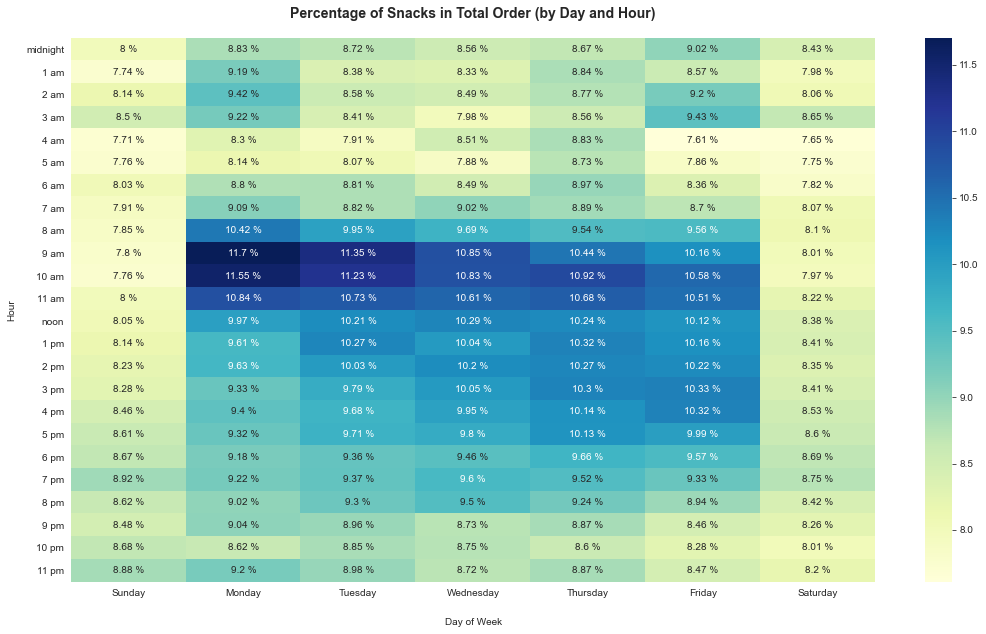

In [106]:
plt.figure(figsize=(18,10))

ax = sns.heatmap(percentage_snacks_by_time_pvt, cmap="YlGnBu", xticklabels=x_axis_labels, annot=True, yticklabels=y_axis_labels, fmt='n')

plt.title("Percentage of Snacks in Total Order (by Day and Hour)", fontsize=14, weight='bold', pad=20)
plt.xlabel("Day of Week", labelpad=20)
plt.ylabel("Hour", labelpad=10)
plt.yticks(rotation=0)
plt.tick_params(left=False, bottom=False)
for t in ax.texts: t.set_text(t.get_text() + " %") # format the annotations with % sign

plt.show()

<b>Aha! We see a different picture when plotting the percentage of snacks in each order.</b>

While Monday morning (between 8am and noon) is still the time when the most snacks are in each order (peaking at 11.7% at 9am), we now also see that generally orders contain the highest percentage of snacks when placed between Monday and Friday (particularly in the morning).

[↑ Back to TOC](#TOC)
## Conclusion <a name="conclusion"></a>
So where does this leave us?

* First and foremost, people's Instacart ordering habits tend to be practical, and consistent, as orders primarily contain products from the produce and dairy/eggs departments regardless of time or day. (How dull for us). Combined with the fact that the highest amount of orders are placed on Sunday and Monday, the overall suggestion from this data is that Instacart is used to gather ingredients for meal preparation for the week ahead, rather than ready foods.


* That being said, the third most popular department is snacks. When we hone in on snack ordering trends, we see that the largest amount of snack orders occur on Sunday and Monday (peaking on Monday between 9am and noon). The amount of snacks ordered is quite small in the hours before 7am, and after 8pm.


* BUT when we look at the percentage of snacks within each order, we see that orders contain the highest percentage of snacks when placed in the morning between Monday and Friday, peaking on Monday morning (between 8am and noon). We also see that while the highest percentage of snacks in cart occurs between 8am and 8pm, there are late night highs as well (particularly Mondays between 1-3am, and Fridays between 2-3pm).


* We would recommend to Instacart that they recognize the impact of Monday morning blues on snack ordering, by perhaps recommending an exciting new flavour at this time. Further, they may consider increasing snack ads on the weekends to remind customers of their importance. 

Some fun avenues for future exploration include: 
* The biggest time-based anomaly detected was the shift to (non-alcoholic) beverages between the hours of 1-6am. We can think of a few reasons we might be thirsty at this hour, but it would be an interesting subject to explore further. 
* The wild popularity of bananas. 

Thanks for reading!